## Evaluating option prices using the FFT
### Calculating call and put options for the Carr & Madan method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,10))
import pandas as pd
from scipy import fftpack
import itertools

<Figure size 864x720 with 0 Axes>

In [2]:
import timeit

In [3]:
import numpy as np
import math
import scipy.stats as si
from math import log, sqrt, exp
from scipy import stats
import matplotlib.pyplot as plt

## Characteristic function

In [5]:
def ft_option(rf,sg,t,a,g):
    #g_=[g - i*(a+1)]
    g_=[i - complex(0,(a+1)) for i in g]
    
    #y1 = ft_pdf(rf,sg,t,g_)
    y1 = ft_pdf(rf,sg,t,g_)
    
    #y2 = a^2 + a - g.^2 + i*(2*a+1)*g;
    y2=[a**(2)+a-i**(2)+complex(0,2*a+1)*i for i in g]
    
    # = y1./ y2;
    y=[ i/j for i,j in zip(y1,y2)]
    return y

In [6]:
def FFT_Pricing_CallPut(S,rf,sg,t,alpha,npower):
    #find the number of points
    
    N = 2**(npower)
    
    #spacing in the strike
    lambda_ = 0.01;
    
    #parameters for the characteristic function grid (0,N*eta)
    eta = 2*np.pi/(N*lambda_)
    
    #create grid for the cf 
    u=list(range(N))
    g=[i * eta for i in u]
     
    #create grid for the strike
    k0 = (-N*lambda_)/2
    k = [k0+(i * lambda_) for i in u]
    
    #compute the characteristic function
    fc=ft_option(rf,sg,t,alpha,g)
    
    
    #trapezoidal rule
    w = [0.5]+ list(np.ones(N-2)) +[0.5]; 
    #h2=[a * b for a, b in zip ([ (np.e**(i*complex(0,-k0))) for i in g],[j*i * eta for i,j in zip(fc,w)])]
    
    h2=[(np.e**(complex(0,-k0*i)))*j*k*eta for i,j,k in itertools.zip_longest(g,fc,w)]
        
    #Fourier inversion
    g=fftpack.fft(h2)
    g2=[((np.e**(-alpha*a))/np.pi*b).real for a, b in zip (k,g)]
    
    K = [S*np.e**(i) for i in k] 
    K =np.transpose(K)


    Y=[np.e**(-rf*t)*S*i for i in g2]
    Y =np.transpose(Y)
    Dict = {'Strike Price':K, 'Option Price':Y}

    return Dict 



In [7]:
W = FFT_Pricing_CallPut(100,0.05,0.2,1,7,8) #List of call prices from FFT
Strk = W['Strike Price']
Y = W['Option Price']


In [32]:
W

{'Strike Price': array([ 27.80373005,  28.08316218,  28.36540265,  28.65047969,
         28.93842179,  29.22925777,  29.52301669,  29.81972794,
         30.11942119,  30.42212641,  30.72787386,  31.03669413,
         31.34861809,  31.66367694,  31.98190218,  32.30332564,
         32.62797946,  32.95589611,  33.28710837,  33.62164937,
         33.95955256,  34.30085174,  34.64558103,  34.99377491,
         35.3454682 ,  35.70069606,  36.05949402,  36.42189796,
         36.78794412,  37.1576691 ,  37.53110989,  37.90830381,
         38.2892886 ,  38.67410235,  39.06278354,  39.45537104,
         39.85190411,  40.2524224 ,  40.65696597,  41.06557528,
         41.47829117,  41.89515492,  42.31620823,  42.74149319,
         43.17105234,  43.60492863,  44.04316545,  44.48580662,
         44.93289641,  45.38447953,  45.84060113,  46.30130683,
         46.7666427 ,  47.23665527,  47.71139155,  48.19089901,
         48.6752256 ,  49.16441975,  49.65853038,  50.15760691,
         50.66169924,  5

In [8]:
WPa = FFT_Pricing_CallPut(100,0.05,0.2,1,2.1,8)
StrkP = W['Strike Price']
YPa = WPa['Option Price']

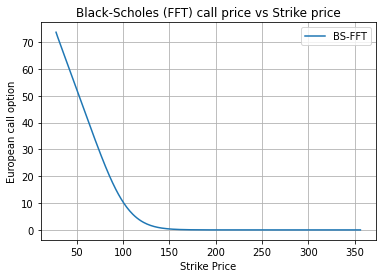

In [9]:


plt.plot(Strk,Y,label='BS-FFT')
#plt.plot(Strk,Y,label='BS-FFt')
plt.xlabel('Strike Price')
plt.ylabel('European call option')
plt.title('Black-Scholes (FFT) call price vs Strike price')
plt.legend()
plt.grid(True) 
#return df.head(10)

## Changing the sign of $\alpha$ gives us the put options.

In [10]:
WP = FFT_Pricing_CallPut(100,0.05,0.2,1,-3.1,8)
StrkP = WP['Strike Price']
YP = WP['Option Price']


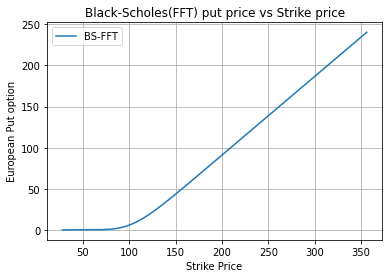

In [11]:
plt.plot(StrkP,YP,label='BS-FFT')

plt.xlabel('Strike Price')
plt.ylabel('European Put option')
plt.title('Black-Scholes(FFT) put price vs Strike price')
plt.legend()
plt.grid(True) 
#return df.head(10)



# Analytical Black-Scholes Call option code

In [12]:

# List of strikes generated from the FFT code
Strk = W['Strike Price']

"""
S = 100 
T = 1
r = 0.05
alpha = 2
sigma = 0.2
"""

call_list = [] # Call prices calculated using Black-Scholes analytical formula are appended to this list

def BScall(S, K, T, r, sigma):

    float(S)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    value = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    #si.norm.cdf() computes the cumulative distribution function of a normal random variable
    return value


for K in Strk:
    call = BScall(100, K, 1, 0.05, 0.2) #Calculates call price for each Strike K given
    call_list.append(call) 


#plt.plot(Strk,call_list,label='BS')
#plt.plot(Strk,Y,label='BS-FFt')
#plt.xlabel('Strike Price')
#plt.ylabel('European call option')
#plt.title('Black-Scholes call price vs Strike price')
#plt.legend()
#plt.grid(True) 



# Analytical Black-Scholes put option code

In [13]:

# List of strikes generated from the FFT code
Strk = W['Strike Price']


put_list = [] # Call prices calculated using Black-Scholes analytical formula are appended to this list
#Btime = 
def BSput(S, K, T, r, sigma):

    float(S)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    value = (-S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0))
    #si.norm.cdf() computes the cumulative distribution function of a normal random variable
    return value
  
for K in Strk:
    put = BSput(100, K, 1, 0.05, 0.2) #Calculates call price for each Strike K given
    put_list.append(put) 




#for K in Strk:
 #   start = timeit.timeit()
 #   put = BSput(100, K, 1, 0.05, 0.2) #Calculates call price for each Strike K given
  #  put_list.append(put) 
  #  stop = timeit.time()
   # duration = stop-start
   # print(duration)


#plt.plot(Strk,put_list,label='BS')
#plt.plot(Strk,Y,label='BS-FFt')
##plt.xlabel('Strike Price')
#plt.ylabel('European put option')
#plt.title('Black-Scholes put price vs Strike price')
#plt.legend()
#plt.grid(True) 



In [14]:
#put_list

In [15]:
 BSput(100, 150, 1, 0.05, 0.2)

43.04404350126002

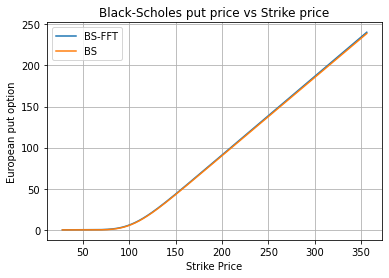

In [16]:
plt.plot(StrkP,YP,label='BS-FFT')
plt.plot(Strk,put_list,label='BS')
#plt.plot(Strk,Y,label='BS-FFt')
plt.xlabel('Strike Price')
plt.ylabel('European put option')
plt.title('Black-Scholes put price vs Strike price')
plt.legend()
plt.grid(True) 

## Plotting the call price of the analytical solution against the FFT solution

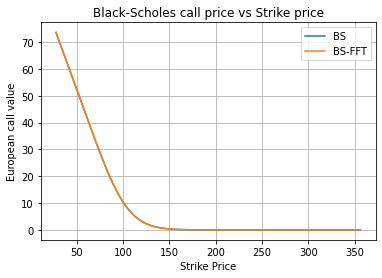

In [17]:
plt.plot(Strk,call_list,label='BS')
plt.plot(Strk,Y,label='BS-FFT')
plt.xlabel('Strike Price')
plt.ylabel('European call value')
plt.title('Black-Scholes call price vs Strike price')
plt.legend()
plt.grid(True)

## Testing for the run-time

In [18]:

elapsed_time = timeit.timeit(Btime, number=1)
print(elapsed_time)

elapsed_time = timeit.timeit(Btime, number=1)
print(elapsed_time)

elapsed_time = timeit.timeit(Btime, number=1)
print(elapsed_time)

elapsed_time = timeit.timeit(Btime, number=1)
print(elapsed_time)

elapsed_time = timeit.timeit(Btime, number=1)
print(elapsed_time)

elapsed_timefft = timeit.timeit(qfft, number=1)
print(elapsed_time)

NameError: name 'Btime' is not defined

## True absolute error for calls

In [19]:
Error = np.zeros(len(Strk))

for i in range(len(Strk)):
    Error[i] = np.abs(call_list[i]-Y[i])
    

## True absolute error for puts

In [20]:
Errorput = np.zeros(len(Strk))

for i in range(len(Strk)):
    Errorput[i] = np.abs(put_list[i]-YP[i])

In [21]:
#Error

In [22]:
Errp=Errorput[125:256]

In [23]:
Strkp=Strk[125:256]

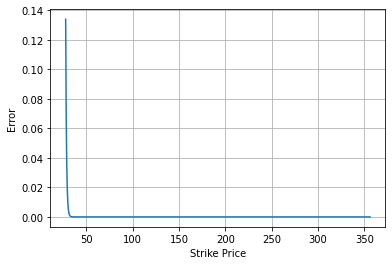

In [24]:
plt.plot(Strk, Error)
#plt.plot(Strk, Error)
#plt.plot(Strk,YPa,label='BS-FFt')
plt.xlabel('Strike Price')
plt.ylabel('Error')
#plt.title('Black-Scholes(FFT) put price vs Strike price')
#plt.legend()
plt.grid(True) 
#plt.ylim(0, 0.0010)
#plt.xlim(20,100)
#return df.head(10)



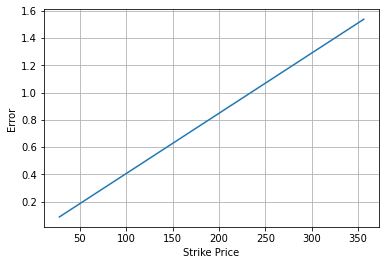

In [25]:
plt.plot(Strk, Errorput)
#plt.plot(Strk,YPa,label='BS-FFt')
plt.xlabel('Strike Price')
plt.ylabel('Error')
#plt.title('Black-Scholes(FFT) put price vs Strike price')
#plt.legend()
plt.grid(True) 
#plt.ylim(0, 5)
#plt.xlim(0,10)
#return df.head(10)

#Different values of $\alpha$.

In [26]:
Strk = W['Strike Price']
Y = W['Option Price']
AlpCall = []


alpha1 = FFT_Pricing_CallPut(100,0.05,0.2,1,0.5,8)['Option Price']
alpha2 = FFT_Pricing_CallPut(100,0.05,0.2,1,1,8)['Option Price']
alpha3 = FFT_Pricing_CallPut(100,0.05,0.2,1,2,8)['Option Price']
alpha4 = FFT_Pricing_CallPut(100,0.05,0.2,1,5,8)['Option Price']
alpha5 = FFT_Pricing_CallPut(100,0.05,0.2,1,6,8)['Option Price']

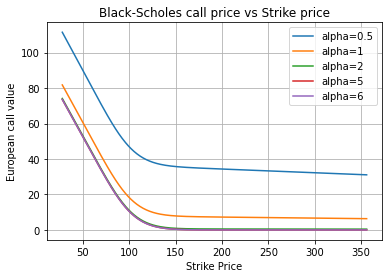

In [27]:
plt.plot(Strk,alpha1,label='alpha=0.5')
plt.plot(Strk,alpha2,label='alpha=1')
plt.plot(Strk,alpha3,label='alpha=2')
plt.plot(Strk,alpha4,label='alpha=5')
plt.plot(Strk,alpha5,label='alpha=6')


plt.xlabel('Strike Price')
plt.ylabel('European call value')
plt.title('Black-Scholes call price vs Strike price')
plt.legend()
plt.grid(True)



In [28]:
#ND = np.linspace(0,Strk)

In [29]:
#math.log(2,2)

In [30]:
Strk = W['Strike Price']
Y = W['Option Price']
AlpCall = []


alpha1 = FFT_Pricing_CallPut(100,0.05,0.2,1,-1.5,8)['Option Price']
alpha2 = FFT_Pricing_CallPut(100,0.05,0.2,1,-2,8)['Option Price']
alpha3 = FFT_Pricing_CallPut(100,0.05,0.2,1,-3,8)['Option Price']
alpha4 = FFT_Pricing_CallPut(100,0.05,0.2,1,-5,8)['Option Price']
alpha5 = FFT_Pricing_CallPut(100,0.05,0.2,1,-6,8)['Option Price']

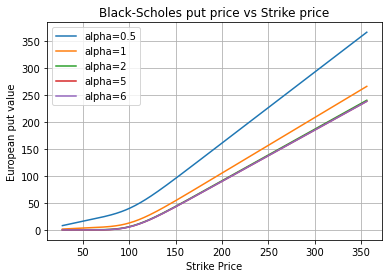

In [31]:
plt.plot(Strk,alpha1,label='alpha=0.5')
plt.plot(Strk,alpha2,label='alpha=1')
plt.plot(Strk,alpha3,label='alpha=2')
plt.plot(Strk,alpha4,label='alpha=5')
plt.plot(Strk,alpha5,label='alpha=6')


plt.xlabel('Strike Price')
plt.ylabel('European put value')
plt.title('Black-Scholes put price vs Strike price')
plt.legend()
plt.grid(True)